In [1]:
# required packages here
library("ggplot2")
# library(randomcoloR)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
data <- read.csv("hotel_bookings.csv")
dim(data)

[1] 119390     32

In [3]:
head(data)

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03
Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


In [4]:
str(data)

'data.frame':	119390 obs. of  32 variables:
 $ hotel                         : Factor w/ 2 levels "City Hotel","Resort Hotel": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                   : int  0 0 0 0 0 0 0 0 1 1 ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : Factor w/ 12 levels "April","August",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ arrival_date_week_number      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : Factor w/ 5 levels "BB","

In [5]:
purple <- "#8300fd"
red <- "#c12525"
colors <- c(purple, red)

# Data Preprocessing

In [6]:
levels(data$arrival_date_month) = list(Jan = "January",
                                       Feb = "February",
                                       Mar = "March",
                                       Apr = "April",
                                       May = "May",
                                       Jun = "June",
                                       Jul = "July",
                                       Aug = "August",
                                       Sept = "September",
                                       Oct = "October",
                                       Nov = "November",
                                       Dec = "December")

In [7]:
colSums(is.na(data) | data == "NULL")

hotel                    is_canceled 
                             0                              0 
                     lead_time              arrival_date_year 
                             0                              0 
            arrival_date_month       arrival_date_week_number 
                             0                              0 
     arrival_date_day_of_month        stays_in_weekend_nights 
                             0                              0 
          stays_in_week_nights                         adults 
                             0                              0 
                      children                         babies 
                             4                              0 
                          meal                        country 
                             0                            488 
                market_segment           distribution_channel 
                             0                              0 
             is_repeated_guest         previous_cancellations 
                             0                              0 
previous_bookings_not_canceled             reserved_room_type 
                             0                              0 
            assigned_room_type                booking_changes 
                             0                              0 
                  deposit_type                          agent 
                             0                          16340 
                       company           days_in_waiting_list 
                        112593                              0 
                 customer_type                            adr 
                             0                              0 
   required_car_parking_spaces      total_of_special_requests 
                             0                              0 
            reservation_status        reservation_status_date 
                             0                              0

In [8]:
data$children[is.na(data$children)] = 0

levels(data$country) <- c(levels(data$country), "UNKNOWN") 
data$country[data$country == "NULL"] <- "UNKNOWN"

levels(data$agent) <- c(levels(data$agent), '0')
data$agent[data$agent == "NULL"] <- '0'

levels(data$company) <- c(levels(data$company), '0')
data$company[data$company == "NULL"] <- '0'

In [9]:
colSums(is.na(data) | data == "NULL")

hotel                    is_canceled 
                             0                              0 
                     lead_time              arrival_date_year 
                             0                              0 
            arrival_date_month       arrival_date_week_number 
                             0                              0 
     arrival_date_day_of_month        stays_in_weekend_nights 
                             0                              0 
          stays_in_week_nights                         adults 
                             0                              0 
                      children                         babies 
                             0                              0 
                          meal                        country 
                             0                              0 
                market_segment           distribution_channel 
                             0                              0 
             is_repeated_guest         previous_cancellations 
                             0                              0 
previous_bookings_not_canceled             reserved_room_type 
                             0                              0 
            assigned_room_type                booking_changes 
                             0                              0 
                  deposit_type                          agent 
                             0                              0 
                       company           days_in_waiting_list 
                             0                              0 
                 customer_type                            adr 
                             0                              0 
   required_car_parking_spaces      total_of_special_requests 
                             0                              0 
            reservation_status        reservation_status_date 
                             0                              0

In [10]:
threshold = 400
outliers = data[data$lead_time > threshold, ]

percentage = nrow(outliers)/nrow(data) * 100
sprintf("Percentage data that has lead time greater than %d days is %.2f%%", threshold, percentage)

data = data[data$lead_time <= threshold, ]

[1] "Percentage data that has lead time greater than 400 days is 1.77%"

In [11]:
data = data[data$stays_in_weekend_nights + data$stays_in_week_nights > 0,]

In [12]:
data = data[data$adults + data$children + data$babies > 0,]

In [13]:
filtered = !(data$is_repeated_guest==1 & (data$previous_cancellations + data$previous_bookings_not_canceled == 0))
data = data[filtered,]

In [14]:
dim(data)

[1] 116141     32

# Data Visualization

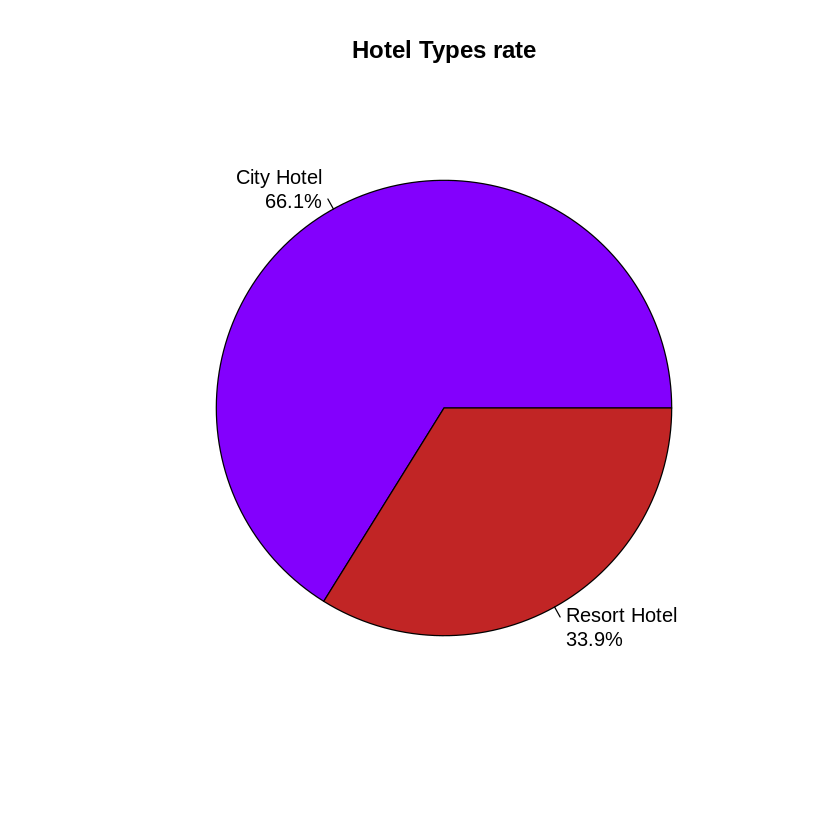

In [32]:
hotel <- table(data$hotel)
hotel_types <- c("City Hotel", "Resort Hotel")

pie_percent<- paste(hotel_types, round(100*hotel/sum(hotel), 1), sep="\n") 
pie_percent<- paste(pie_percent, "%", sep="") 
pie(hotel, main = "Hotel Types rate", labels=pie_percent, col = colors)

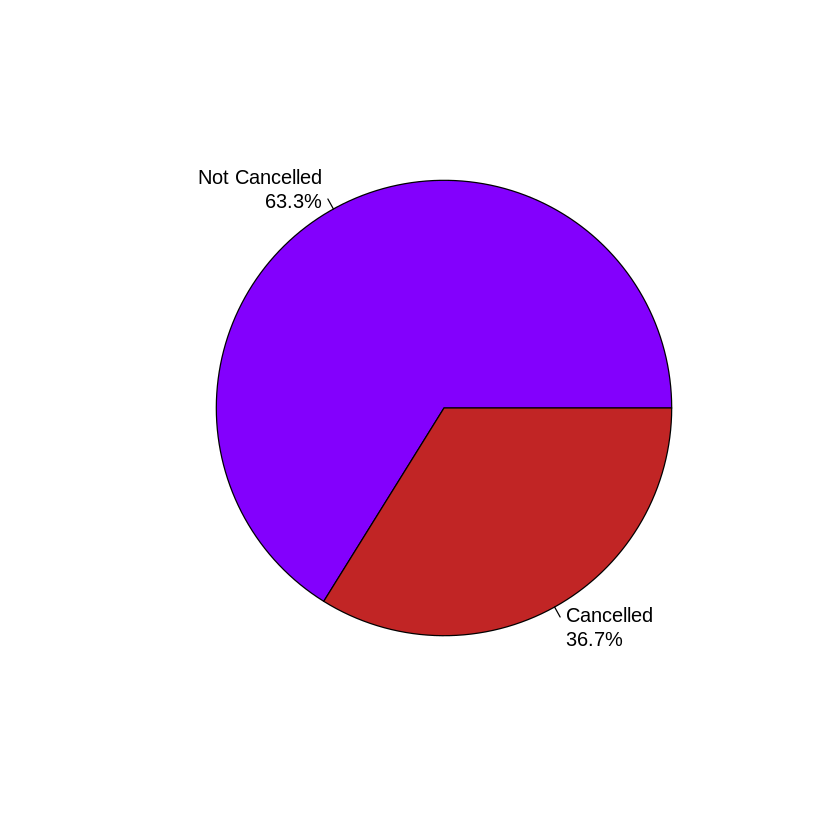

In [16]:
cancel <- table(data$is_canceled)
cancel_label <- c("Not Cancelled", "Cancelled")

pie_percent<- paste(cancel_label, round(100*cancel/sum(cancel), 1), sep="\n") 
pie_percent<- paste(pie_percent, "%", sep="") 
pie(hotel, "Cancellation Rat", labels=pie_percent, col = colors)

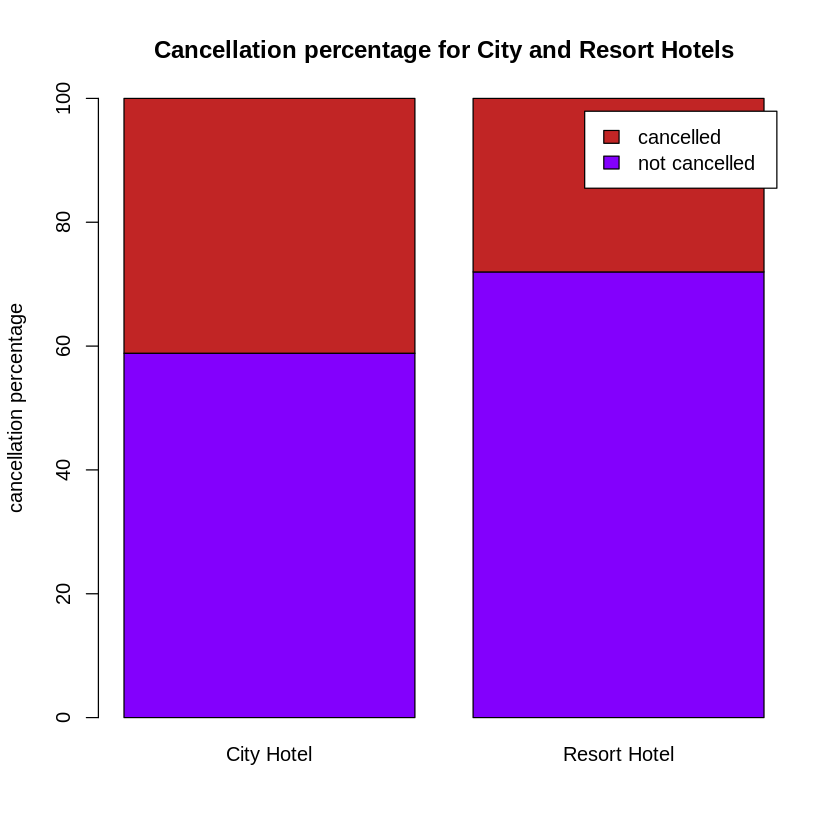

In [17]:
labels <- c("not cancelled", "cancelled")

hotel_cancel <- t(prop.table(table(data$hotel, data$is_canceled), margin = 1)*100)

barplot(hotel_cancel, main = "Cancellation percentage for City and Resort Hotels", 
        , ylim= c(0,100), ylab = "cancellation percentage", legend.text = labels, col = colors)

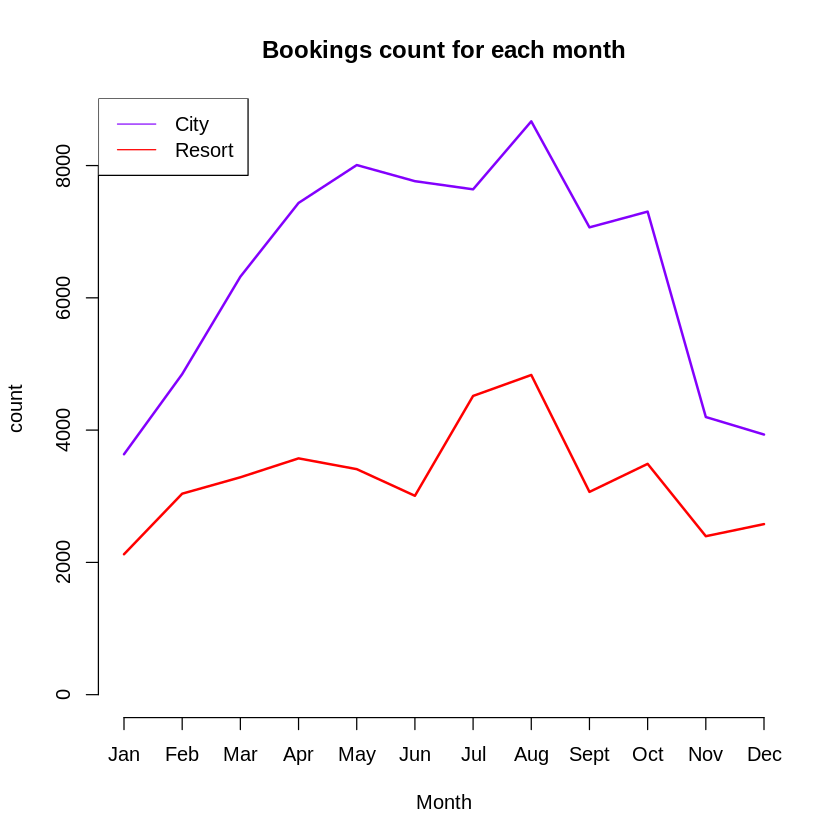

In [31]:
hotel_month <- table(data$hotel, data$arrival_date_month)

city_month = table(data[data$hotel=='City Hotel',]$arrival_date_month)
resort_month = table(data[data$hotel=='Resort Hotel',]$arrival_date_month)

plot(city_month, xlab = "Month", ylab = "count", main = "Bookings count for each month", type="l", col = "#8300fd")
lines(resort_month, col = "red", type="l")
legend("topleft", legend=c("City", "Resort"),
       col=c("#8300fd", "red"), lty=c(1,1))

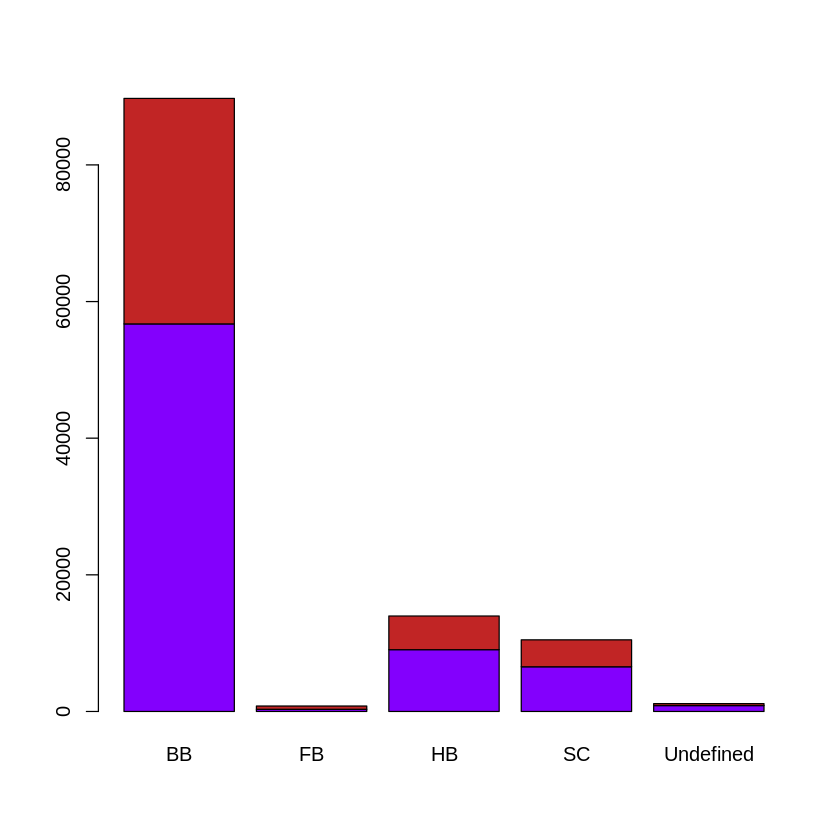

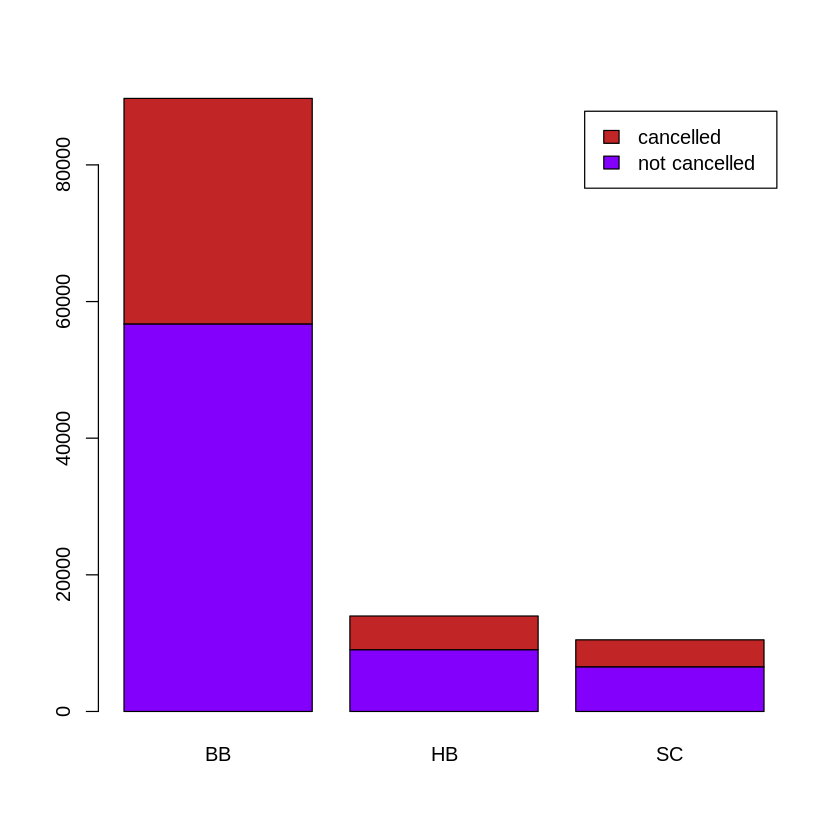

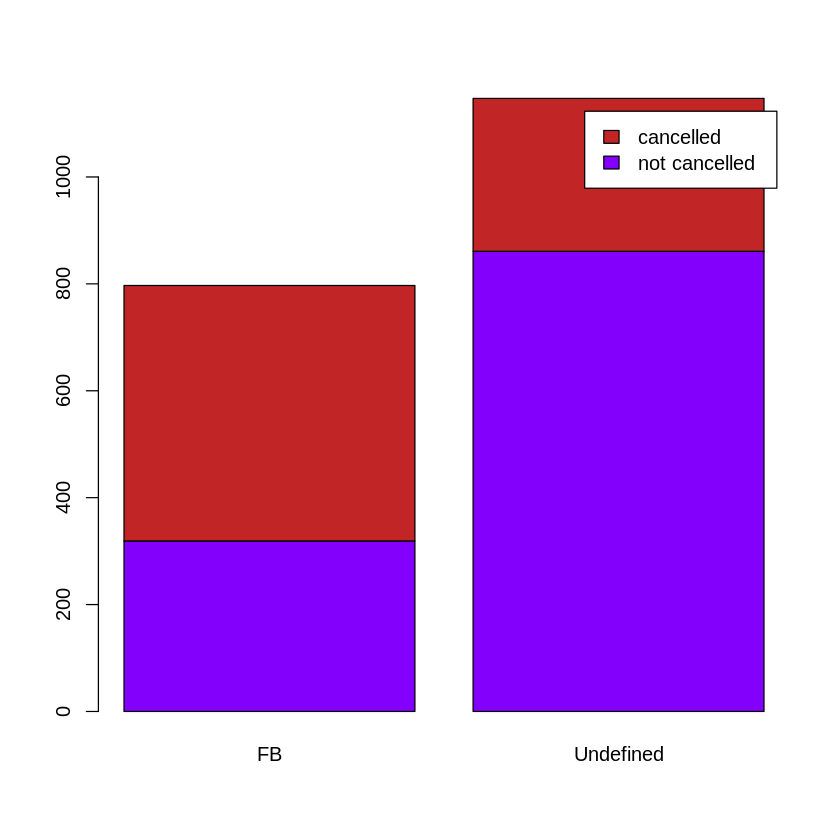

In [19]:
mean_cancel <- t(table(data$meal, data$is_canceled))

barplot(mean_cancel, col=colors)
barplot(mean_cancel[, -c(2, 5)], legend.text = labels, col=colors)
barplot(mean_cancel[, c(2, 5)], legend.text = labels, col=colors)

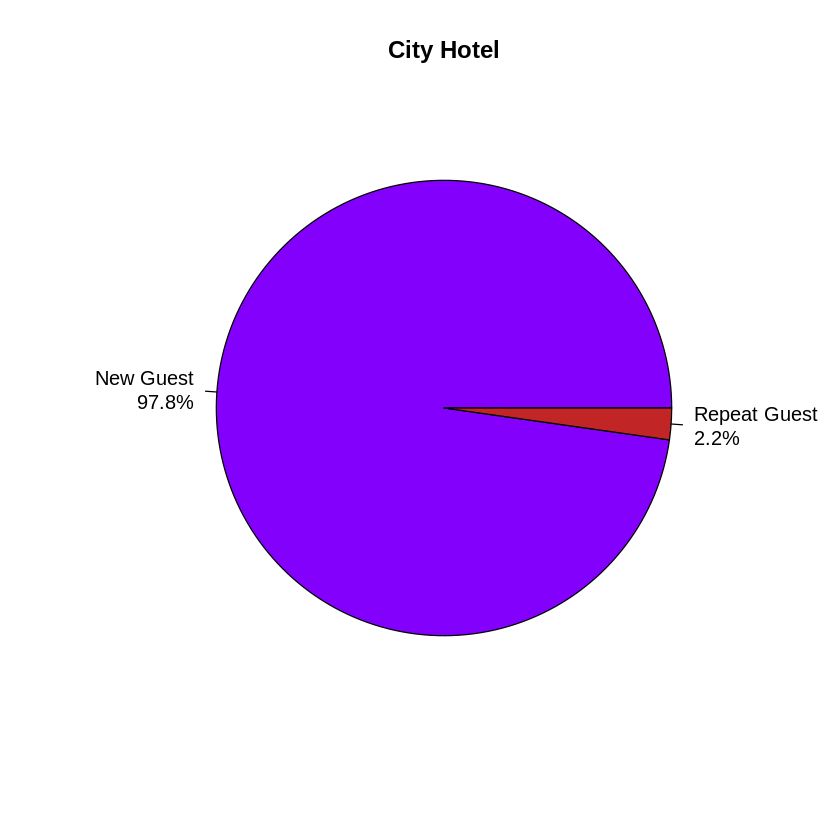

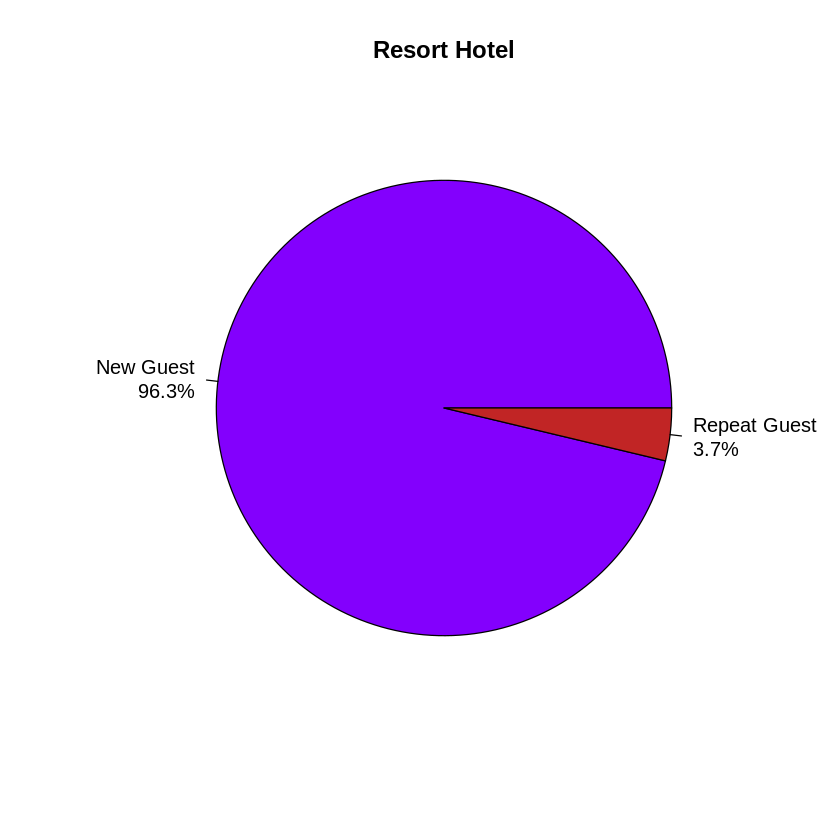

In [20]:
hotel_repeted <- table(data$is_repeated_guest, data$hotel)

repeat_city <- table(data[data$hotel == "City Hotel",]$is_repeated_guest)
repeat_resort <- table(data[data$hotel == "Resort Hotel",]$is_repeated_guest)

repeat_labels <- c("New Guest","Repeat Guest")

pie_percent<- paste(repeat_labels, round(100*repeat_city/sum(repeat_city), 1), sep="\n") 
pie_percent<- paste(pie_percent, "%", sep="") 
pie(repeat_city, labels=pie_percent, main = "City Hotel", col = colors)

pie_percent<- paste(repeat_labels, round(100*repeat_resort/sum(repeat_resort), 1), sep="\n") 
pie_percent<- paste(pie_percent, "%", sep="") 
pie(repeat_resort, labels=pie_percent, main = "Resort Hotel", col = colors)

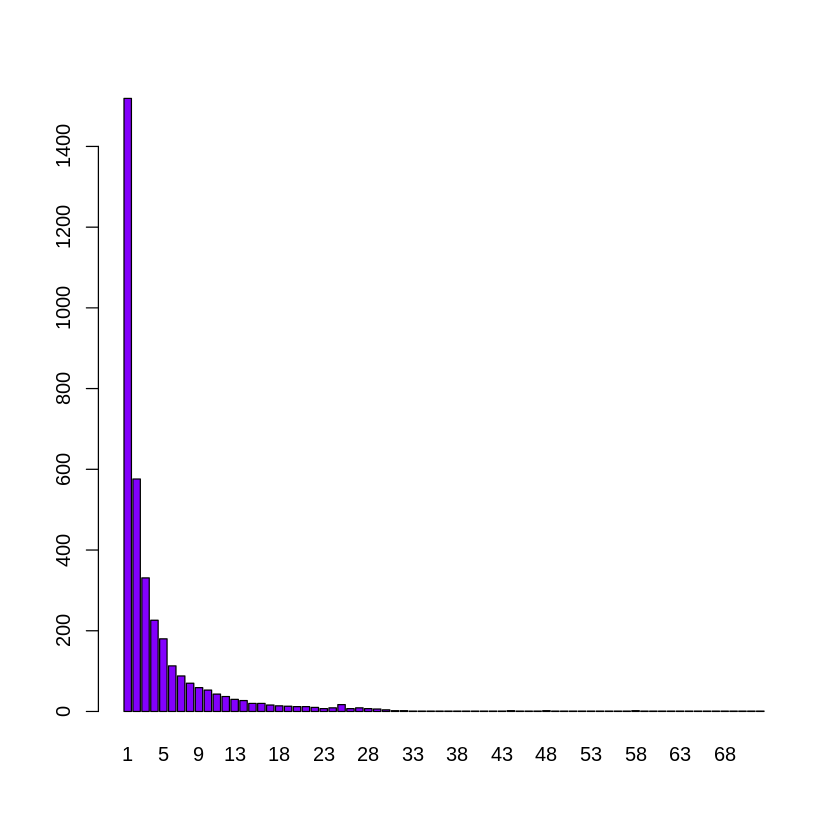

In [21]:
barplot(table(data$previous_bookings_not_canceled)[-1], col = c(purple))

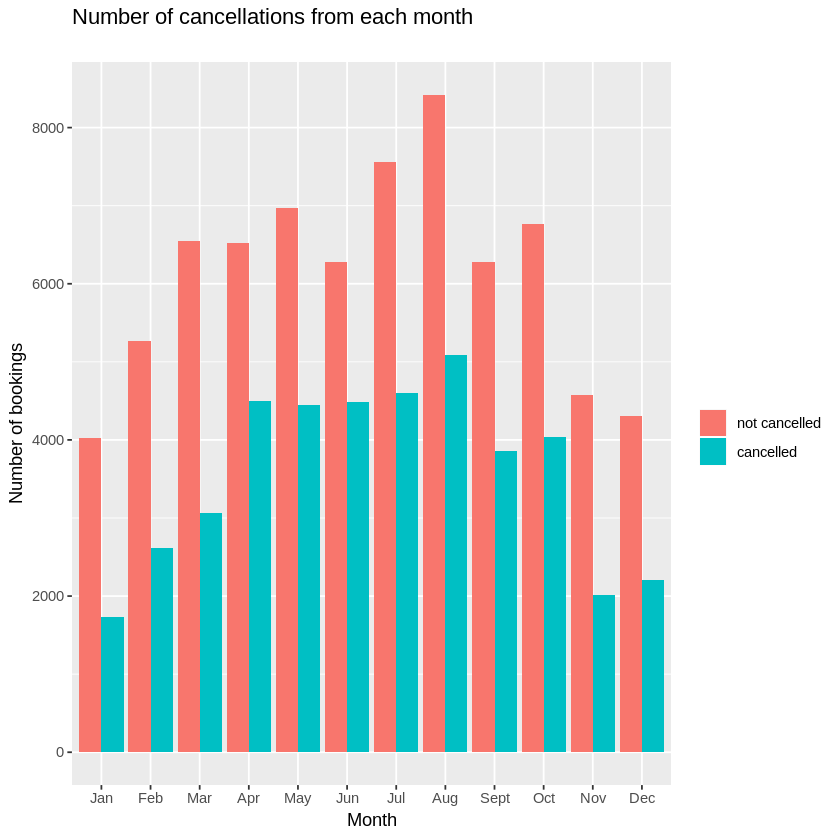

In [22]:
month_cancel <- table(data$is_canceled, data$arrival_date_month)

g <- ggplot(data, aes(x = arrival_date_month , fill = factor(is_canceled)))

g + geom_bar(position = position_dodge()) + 
labs(title = "Number of cancellations from each month\n", x = "Month", y = "Number of bookings")+
scale_fill_discrete(name="", labels=labels)


In [23]:
# ggplot(data[data$hotel=="City Hotel",], aes(x = factor(1), fill= factor(country))) +
# geom_bar(width = 1) +
# coord_polar(theta = "y")

In [24]:
# color = grDevices::colors()[grep('gr(a|e)y', grDevices::colors(), invert = T)]
# cols <- sample(color, 178)

# country_city <- as.data.frame(country_city)

# ggplot(country_city, aes(x = "", y = sort(Freq), colour=Var1, fill= Var1))+
#  geom_col(color = "transparent", width = NULL) +
#   scale_fill_manual(values = sample(color, 178))+
#   coord_polar("y", start = 0) +
#   theme_void()

  CHE   USA   NLD   BRA   BEL   IRL   ITA   DEU   ESP   FRA   GBR   PRT OTHER 
 1720  2066  2094  2212  2334  3363  3746  7016  8528 10350 11868 46223 14621 


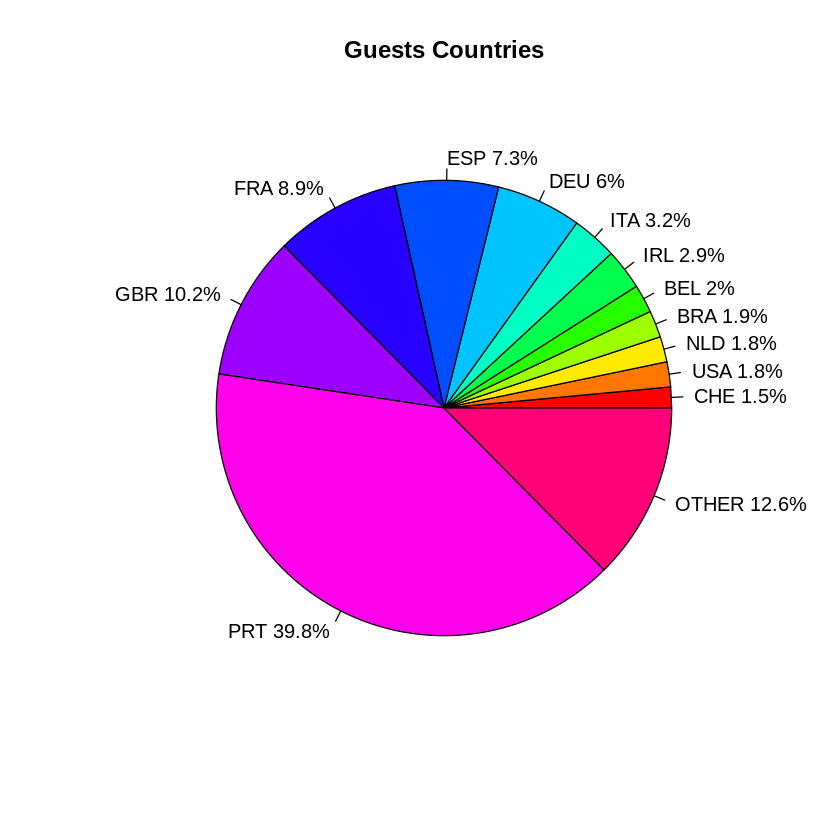

In [25]:
th = 1500
countries = table(data$country)
filtered_countries = countries[countries > th]
filtered_countries = sort(filtered_countries)
filtered_countries["OTHER"] = sum(countries[countries < th])
print(filtered_countries)

labels = names(filtered_countries)

pie_percent<- paste(labels, round(100*filtered_countries/sum(filtered_countries), 1), sep=" ") 
pie_percent<- paste(pie_percent, "%", sep="")

pie(filtered_countries, main = "Guests Countries", labels=pie_percent, col = rainbow(length(filtered_countries)))

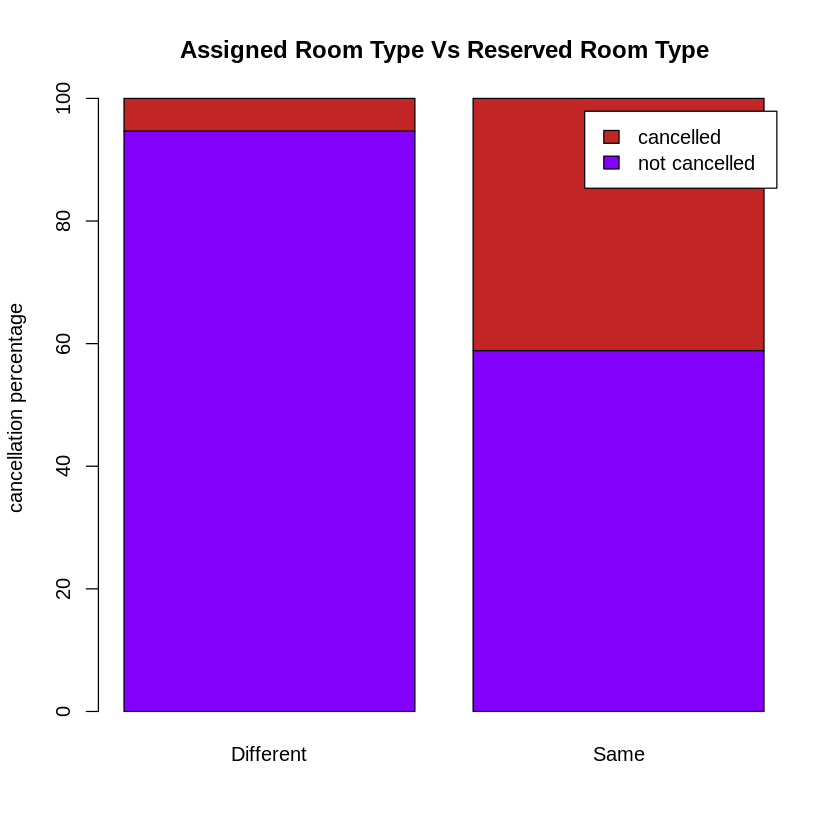

In [26]:
room_types = c("A", "B", "C", "D", "E", "F", "G", "H", "I", "K","L", "P")
f1 = factor(data$assigned_room_type, levels = room_types)
f2 = factor(data$reserved_room_type, levels = room_types)


labels <- c("not cancelled", "cancelled")

room_cancel <- prop.table(table(f1 == f2, data$is_canceled), margin=1)*100
rownames(room_cancel) = c("Different", "Same")
room_cancel <- t(room_cancel)

barplot(room_cancel, main = "Assigned Room Type Vs Reserved Room Type",ylab = "cancellation percentage",legend.text = labels, col = colors)

   
    No Deposit Non Refund Refundable
  0 71.3501305  0.6935545 77.5000000
  1 28.6498695 99.3064455 22.5000000

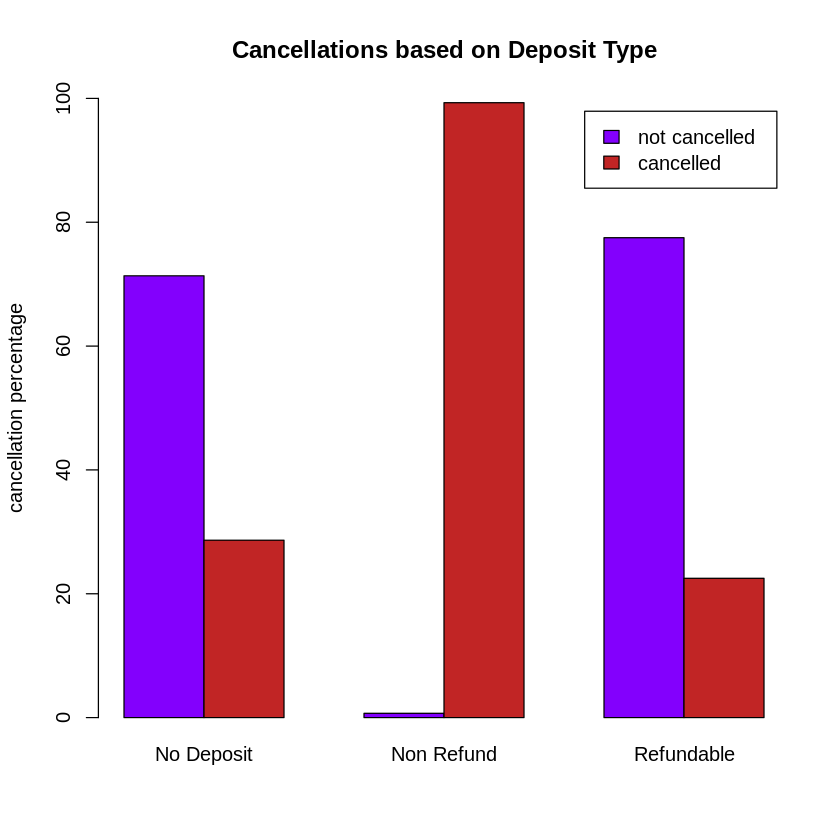

In [27]:
labels <- c("not cancelled", "cancelled")

deposit_cancellation <- t(prop.table(table(data$deposit_type, data$is_canceled), margin=1)*100)
deposit_cancellation

barplot(deposit_cancellation, beside = T, ylim = c(0,100),
        main = "Cancellations based on Deposit Type",ylab = "cancellation percentage",legend.text = labels, col = colors)


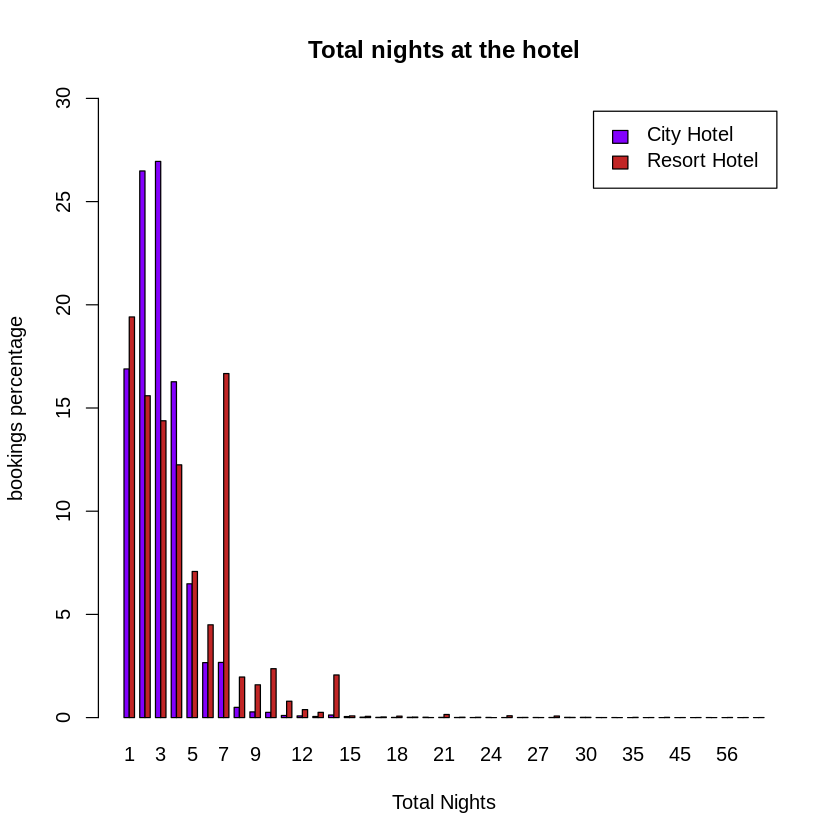

In [28]:
labels <- c("City Hotel", "Resort Hotel")


total_nights = data$stays_in_weekend_nights + data$stays_in_week_nights
hotel_nights = prop.table(table(total_nights, data$hotel), margin=2)*100
hotel_nights = t(hotel_nights)

barplot(hotel_nights, beside = T, ylim = c(0,30), main = "Total nights at the hotel",
        xlab = 'Total Nights', ylab = 'bookings percentage', legend.text = labels, col = colors)